ADF Statistic: -6.463887296823865
p-value: 1.4209710752603302e-08
Стационарен ли ряд? True


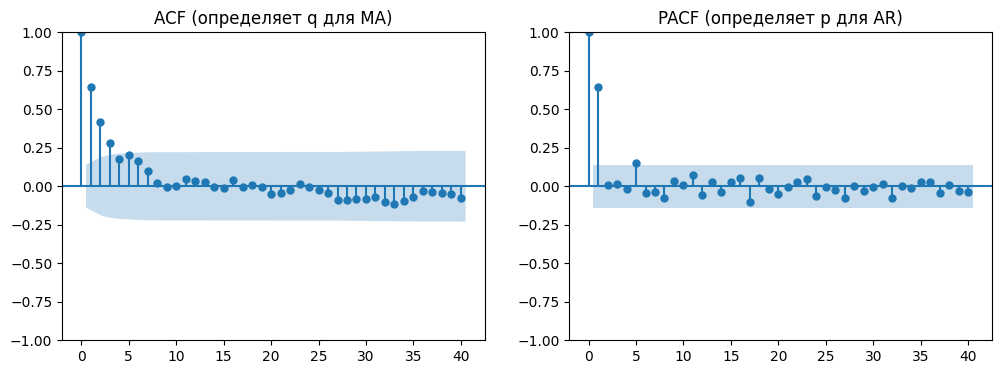

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -268.627
Date:                Wed, 17 Dec 2025   AIC                            543.254
Time:                        01:26:09   BIC                            553.149
Sample:                             0   HQIC                           547.258
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1381      0.186     -0.742      0.458      -0.503       0.227
ar.L1          0.6443      0.056     11.493      0.000       0.534       0.754
sigma2         0.8570      0.086      9.991      0.0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# 1. Генерация синтетического стационарного ряда AR(1)
np.random.seed(42)
n = 200
ar_coef = 0.7  # Параметр AR(1)
epsilon = np.random.normal(0, 1, n)
ts_ar = np.zeros(n)
for t in range(1, n):
    ts_ar[t] = ar_coef * ts_ar[t-1] + epsilon[t]

# 2. Проверка на стационарность (тест Дики-Фуллера)
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] < 0.05

print("Стационарен ли ряд?", check_stationarity(ts_ar))

# 3. Визуализация ACF и PACF для определения p и q
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ts_ar, lags=40, ax=axes[0], title='ACF (определяет q для MA)')
plot_pacf(ts_ar, lags=40, ax=axes[1], title='PACF (определяет p для AR)')
plt.show()

# 4. Построение модели ARIMA(1,0,0) ~ AR(1) и прогноз
model = ARIMA(ts_ar, order=(1, 0, 0))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

# Прогноз на 10 шагов вперед
forecast = model_fit.forecast(steps=10)
print("\nПрогноз на 10 шагов:", forecast)

# 5. Пример с нестационарным рядом (добавляем тренд)
ts_trend = ts_ar + np.arange(n) * 0.05
print("\nРяд с трендом стационарен?", check_stationarity(ts_trend))

# Берём первую разность (d=1) для стабилизации
ts_diff = np.diff(ts_trend)
print("Разность ряда стационарна?", check_stationarity(ts_diff))

# Строим ARIMA(1,1,0) для ряда с трендом
model_arima = ARIMA(ts_trend, order=(1, 1, 0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())


Что здесь важно:

Сначала всегда смотрим на стационарность (adfuller). Если p-value > 0.05 — ряд нестационарен.

Графики ACF/PACF для стационарного ряда помогают выбрать p (резкий спад в PACF) и q (резкий спад в ACF).

ARIMA(1,0,0) = AR(1), ARIMA(0,0,1) = MA(1), ARIMA(1,0,1) = ARMA(1,1).

Параметр d в ARIMA — это степень взятия разностей для устранения тренда.

Для реальных рядов также важно проверять остатки модели на нормальность и отсутствие автокорреляции.

Практическое задание: Прогнозирование уровня воды в реке

Используя данные доступные по: https://github.com/excelllcior/FloodPrediction/blob/main/noska_water_levels.csv

Задача 1: Предварительный анализ и стабилизация ряда

Загрузите данные (water_level.csv). Постройте график исходного ряда. Есть ли визуально тренд, сезонность?
Сделайте вывод о стационарности.

Проведите формальный тест на стационарность (Дики-Фуллер). Если ряд нестационарен, предложите и примените
преобразование (например, взятие первых разностей или логарифмирование). Обоснуйте свой выбор.

Для стационаризованного ряда постройте графики ACF и PACF. Опишите, что вы видите: есть ли признаки AR-процесса (затухание ACF, резкий спад PACF после лага p) или MA-процесса (резкий спад ACF после лага q, затухание PACF)?

Задача 2: Подбор и обучение модели ARIMA

На основе анализа ACF/PACF предложите 2-3 кандидатных набора параметров (p,d,q) для модели ARIMA. Почему вы выбрали именно их?

Обучите модель ARIMA с параметрами (1,1,1) на всем наборе данных. Визуализируйте подобранную модель (постройте график in-sample прогноза вместе с фактическими значениями).

Проверьте остатки обученной модели:

Постройте график остатков. Они выглядят как белый шум (нет паттернов)?

Проведите тест Льюнга-Бокса (Ljung-Box) на автокорреляцию остатков. Сделайте вывод.

Задача 3: Сравнение моделей и прогноз

Обучите ещё одну модель ARIMA с параметрами, которые вы сами выбрали в п.2.1 (например, (2,1,0) или (0,1,2)).

Сравните две модели (ARIMA(1,1,1) и вашу) по информационному критерию Акаике (AIC), который выводится в summary. Какая модель формально лучше? Согласуется ли это с вашим визуальным анализом ACF/PACF?

Используя лучшую модель, постройте точечный прогноз уровня воды на следующие 4 недели. Отобразите на одном графике: исторические данные, in-sample подобранные значения и прогноз с доверительным интервалом.

Критерии оценки:

Корректность выполнения шагов анализа (тест на стационарность, преобразование, анализ ACF/PACF).

Обоснованность выбора параметров модели.

Качество анализа остатков.

Адекватность итогового прогноза и его визуализации.

Формат сдачи:
Jupyter Notebook с кодом (Python), выполненными графиками и краткими текстовыми выводами по каждому пункту задания. Объем выводов — 2-3 предложения на пункт.

